<a href="https://colab.research.google.com/github/karimadel88/diabetes_classification/blob/main/diabetes_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Dataset Analysis, Visualization, Applies Classification Algorithms
- Created By : Karim Adel Eid
- Code : 20181033
----------------------------------------------------------------------------
In this document, we will analyze and visualize the "Diabetes" dataset. We'll perform data exploration, handle any potential problems in the dataset, and then use classification algorithms to make predictions.

## Dataset Description

The "Diabetes" dataset contains various features related to diabetes patients. It includes the following attributes:

1. **Pregnancies**: Number of times pregnant.
2. **Glucose**: Plasma glucose concentration in an oral glucose tolerance test.
3. **BloodPressure**: Diastolic blood pressure (mm Hg).
4. **SkinThickness**: Triceps skinfold thickness (mm).
5. **Insulin**: 2-Hour serum insulin (mu U/ml).
6. **BMI**: Body mass index (weight in kg/(height in m)^2).
7. **DiabetesPedigreeFunction**: Diabetes pedigree function (a measure of the diabetes genetic influence).
8. **Age**: Age in years.
9. **Outcome**: Class variable (0 or 1) indicating the presence of diabetes.

## Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Load the data

In [40]:
data = pd.read_csv('./diabetes.csv')

## Overview about the data

In [41]:
# Show first five rows
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
# Show 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [43]:
# Show details about numeric columns
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### From last describtion i noted 25% from Insulin and skinThickness equal 0 and thats mean 0 can be null value so i will count it to get suitable descion

In [44]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [45]:
# Count zeros
insulin_zeros = (data['Insulin'] == 0).sum()
insulin_zeros

374

In [46]:
# Calculate valid data
data.describe()['Insulin']['count'] - insulin_zeros

394.0

In [47]:

skinThickness_zeros = (data['SkinThickness'] == 0).sum()
skinThickness_zeros

227

### After search in google and know this features can't have zero value so i decide replace zero with null 

In [48]:
data[['Glucose','BloodPressure','SkinThickness','BMI']] = data[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


In [50]:
data.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### Draw Histogram To chose ant feature can fill with mean, median or what can delete it


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

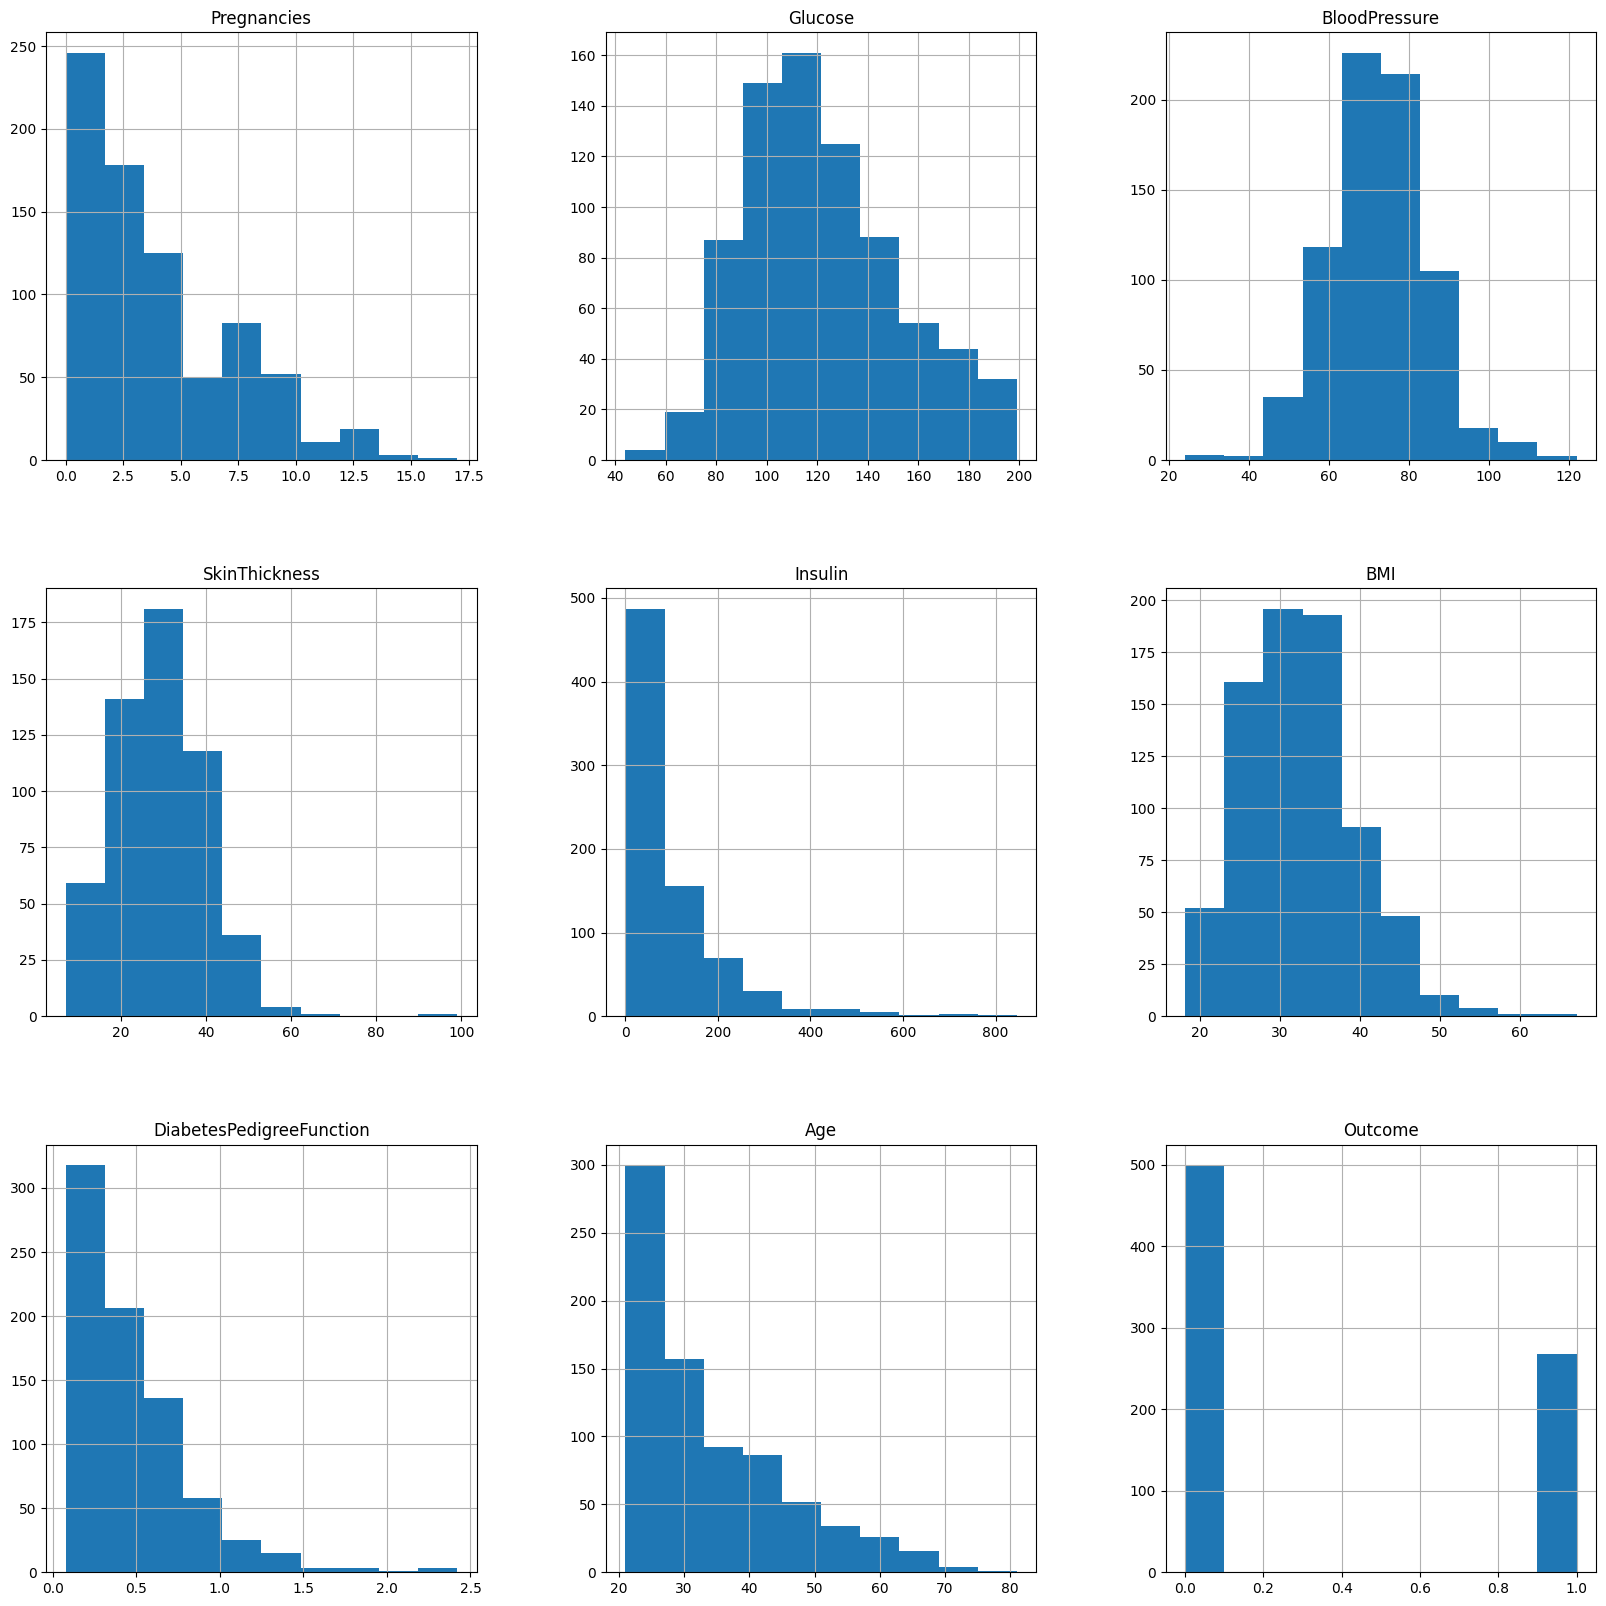

In [52]:
data.hist(figsize = (20,20))

### I decide from last figures and information 
- Fill median with SkinThickness, Insulin and BMI
- fill mean with Clucose and BloodPresure

In [53]:
data['Glucose'].fillna(data['Glucose'].mean(), inplace = True)
data['BloodPressure'].fillna(data['BloodPressure'].mean(), inplace = True)
data['SkinThickness'].fillna(data['SkinThickness'].median(), inplace = True)
data['Insulin'].fillna(data['Insulin'].median(), inplace = True)
data['BMI'].fillna(data['BMI'].median(), inplace = True)

## Ploting after last operation

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

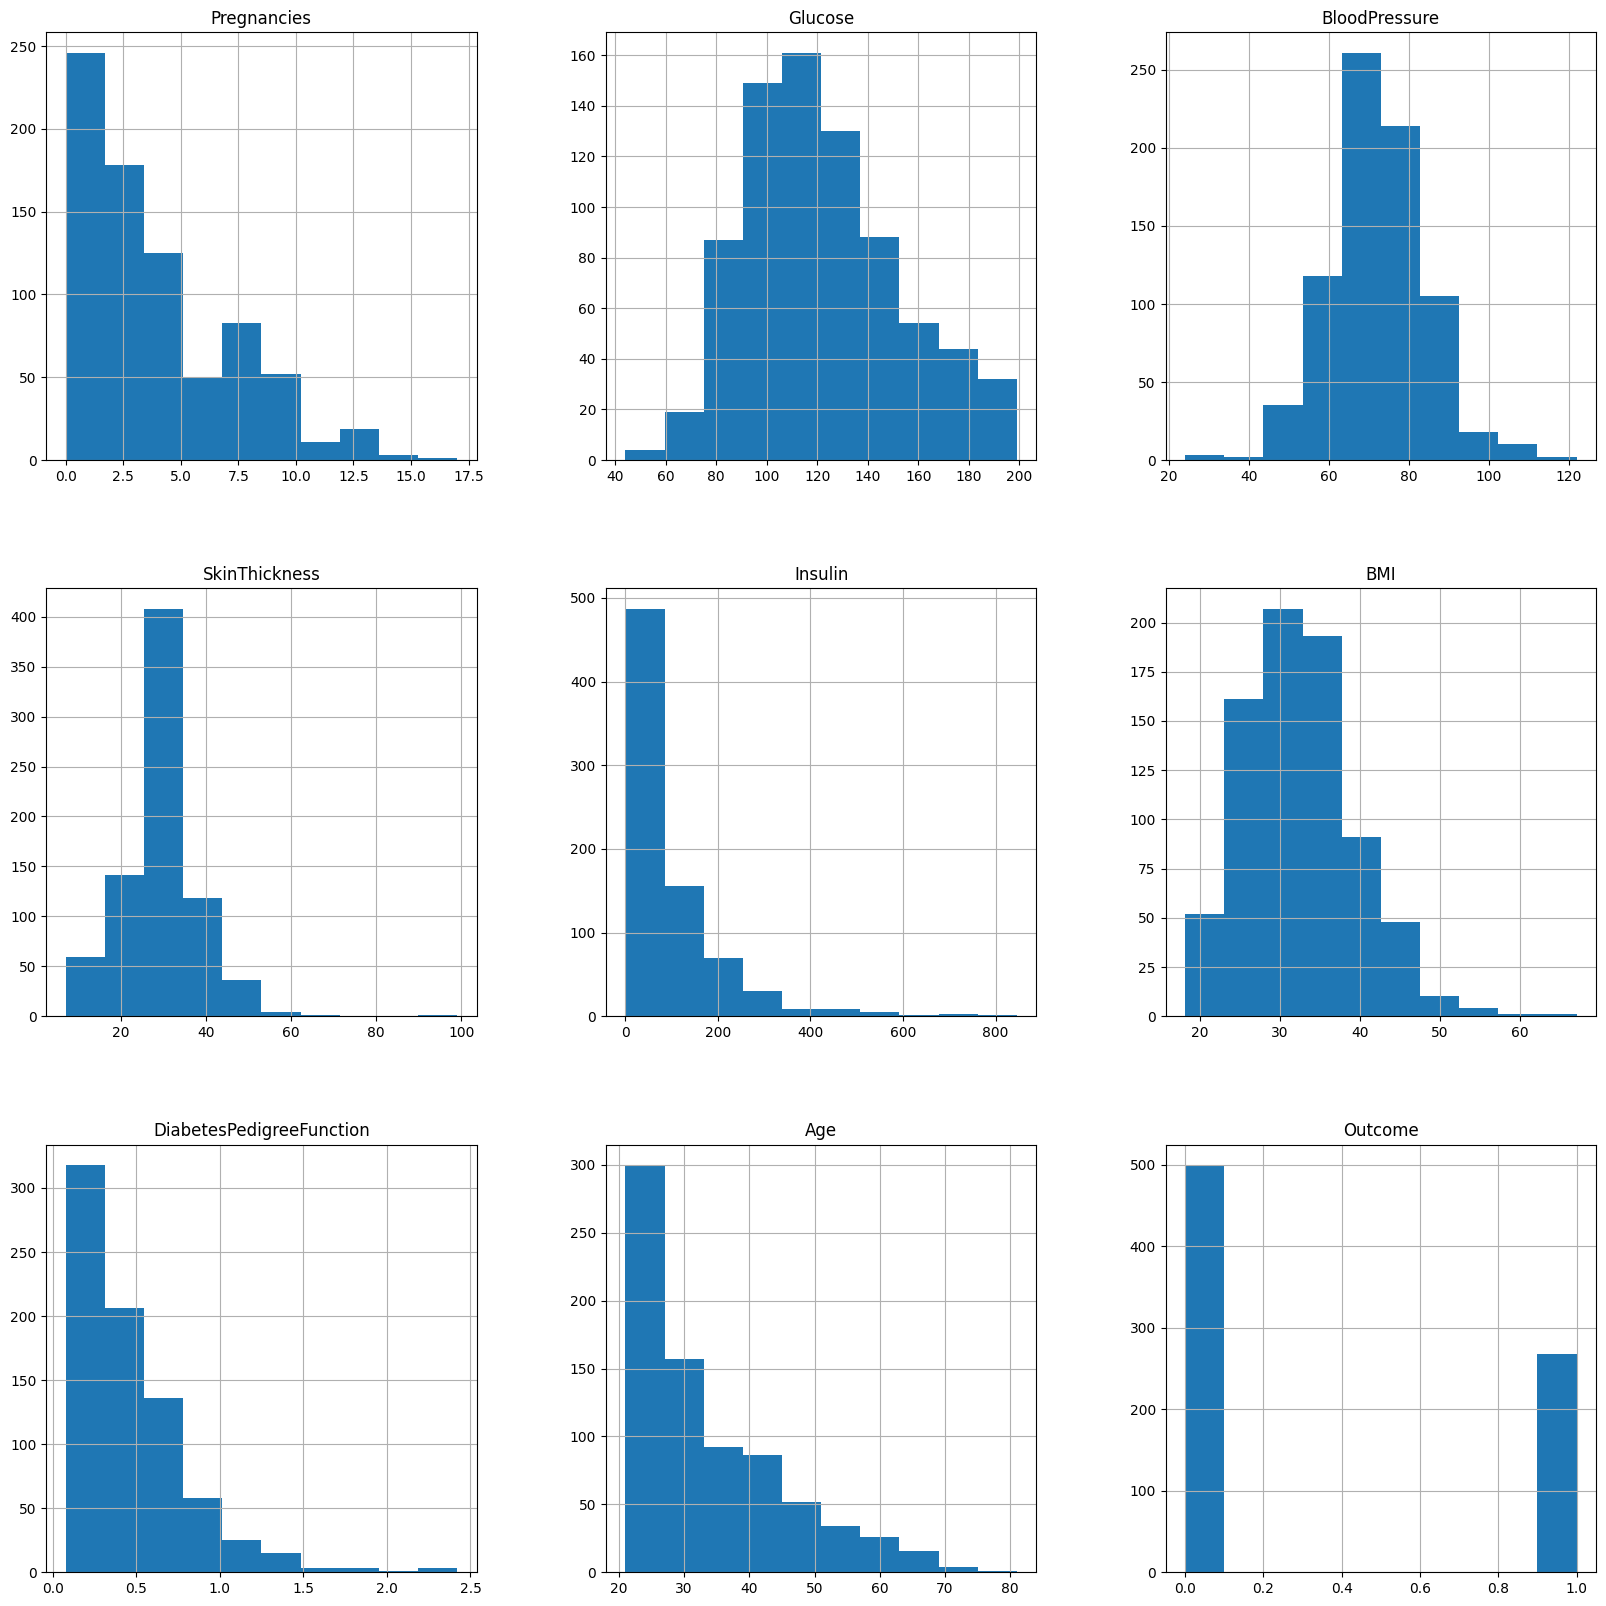

In [54]:
data.hist(figsize = (20,20))

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(5), int64(4)
memory usage: 54.1 KB


## Create 2 Function to show differnce between the target or labels
1.   target count : To show count of two types of outcome 
2.   target_percent : To show the parcent of data

In [56]:
# Split the dataset based on the Outcome variable
D = data[data['Outcome'] != 0]  # Diabetic cases
H = data[data['Outcome'] == 0]  # Healthy cases

# Count of Outcome variable
def target_count():
    plt.figure(figsize=(8, 6))
    sns.countplot(x='Outcome', data=data)
    plt.xlabel('Outcome')
    plt.ylabel('Count')
    plt.title('Count of Outcome variable')
    plt.show()

# Distribution of Outcome variable
def target_percent():
    plt.figure(figsize=(8, 6))
    data['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightskyblue', 'gold'])
    plt.title('Distribution of Outcome variable')
    plt.ylabel('')
    plt.show()


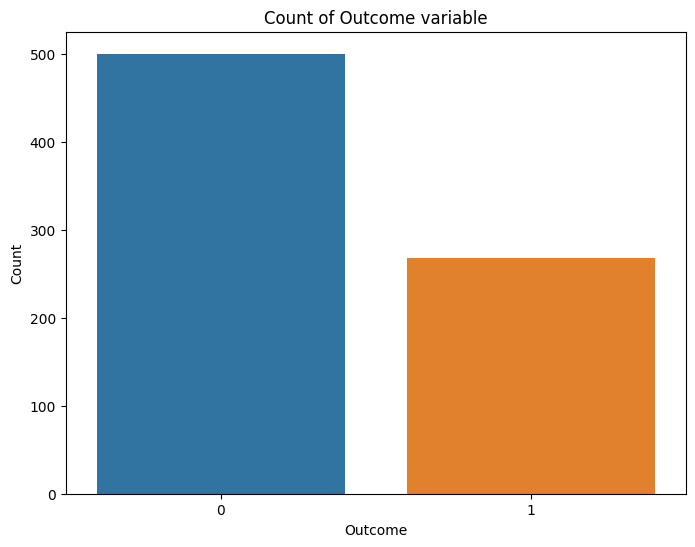

In [57]:
# Call target_count function
target_count()

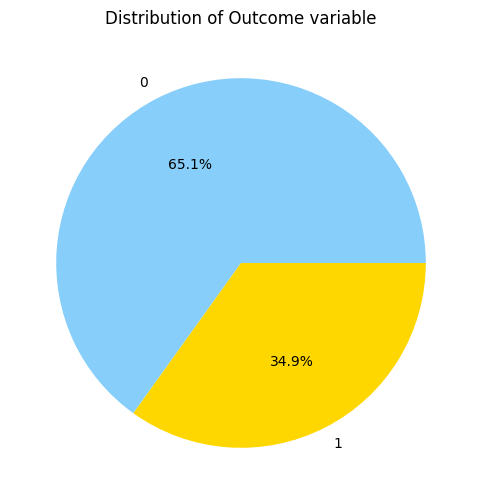

In [58]:
target_percent()

## Some Summary information

In [59]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.710121,70.935397,27.726000,68.792000,30.885600,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.686567,100.335821,35.383582,0.550500,37.067164


In [62]:
# The Difference between mean and median
data.groupby('Outcome').agg(['mean','median'])

Pregnancies            Glucose        BloodPressure         \
               mean median        mean median          mean median   
Outcome                                                              
0          3.298000    2.0  110.710121  107.5     70.935397   72.0   
1          4.865672    4.0  142.165573  140.0     75.147324   74.0   

        SkinThickness            Insulin               BMI         \
                 mean median        mean median       mean median   
Outcome                                                             
0           27.726000   29.0   68.792000   39.0  30.885600  30.40   
1           31.686567   29.0  100.335821    0.0  35.383582  34.25   

        DiabetesPedigreeFunction               Age         
                            mean median       mean median  
Outcome                                                    
0                       0.429734  0.336  31.190000   27.0  
1                       0.550500  0.449  37.067164   36.0

## Some informative plots

### Histogram Plots
- To Show Skewed Distrubation

<ipython-input-63-9d8ebb8d7fe8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-63-9d8ebb8d7fe8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[col])
<ipython-input-63-9d8ebb8d7fe8>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

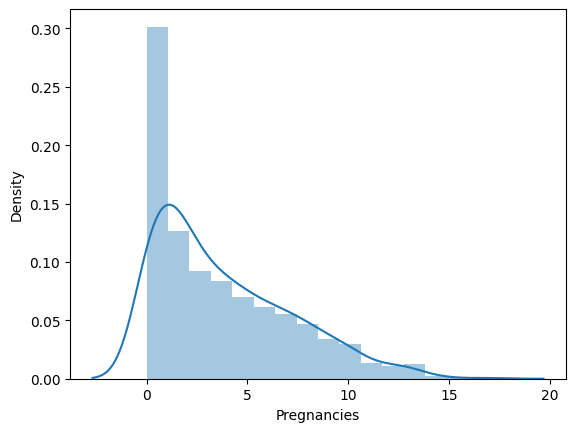

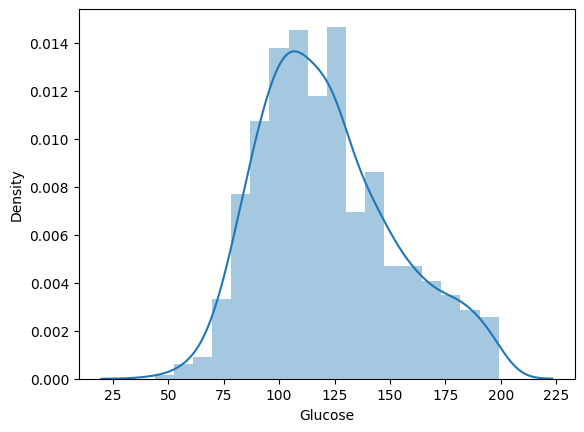

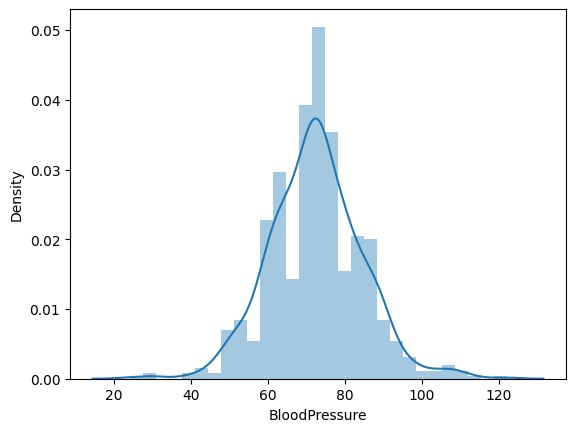

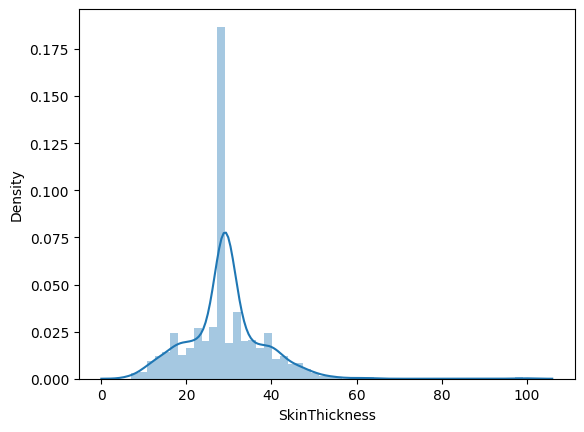

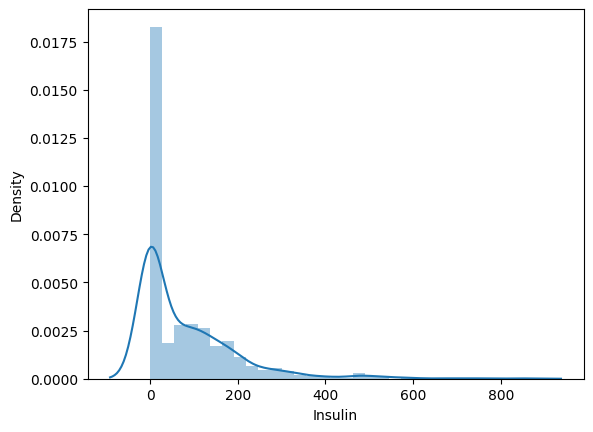

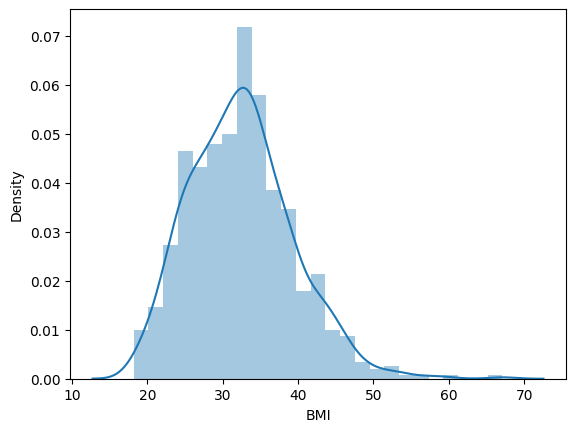

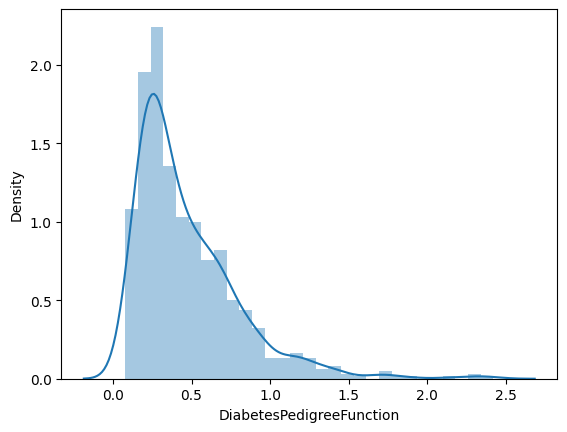

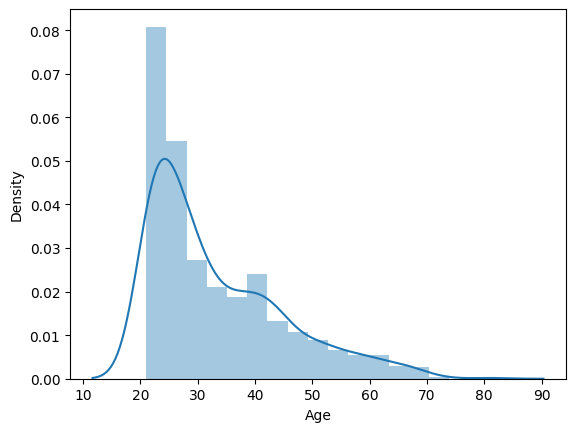

In [63]:
for i,col in enumerate(data.columns[:-1]):
  plt.figure(i)
  sns.distplot(data[col])

## Scatter Matrix
- displays pairwise relationships between multiple variables in a dataset. It is a grid of scatter plots where each variable is plotted against every other variable. This visualization is useful for exploring correlations, patterns, and potential relationships between variables.

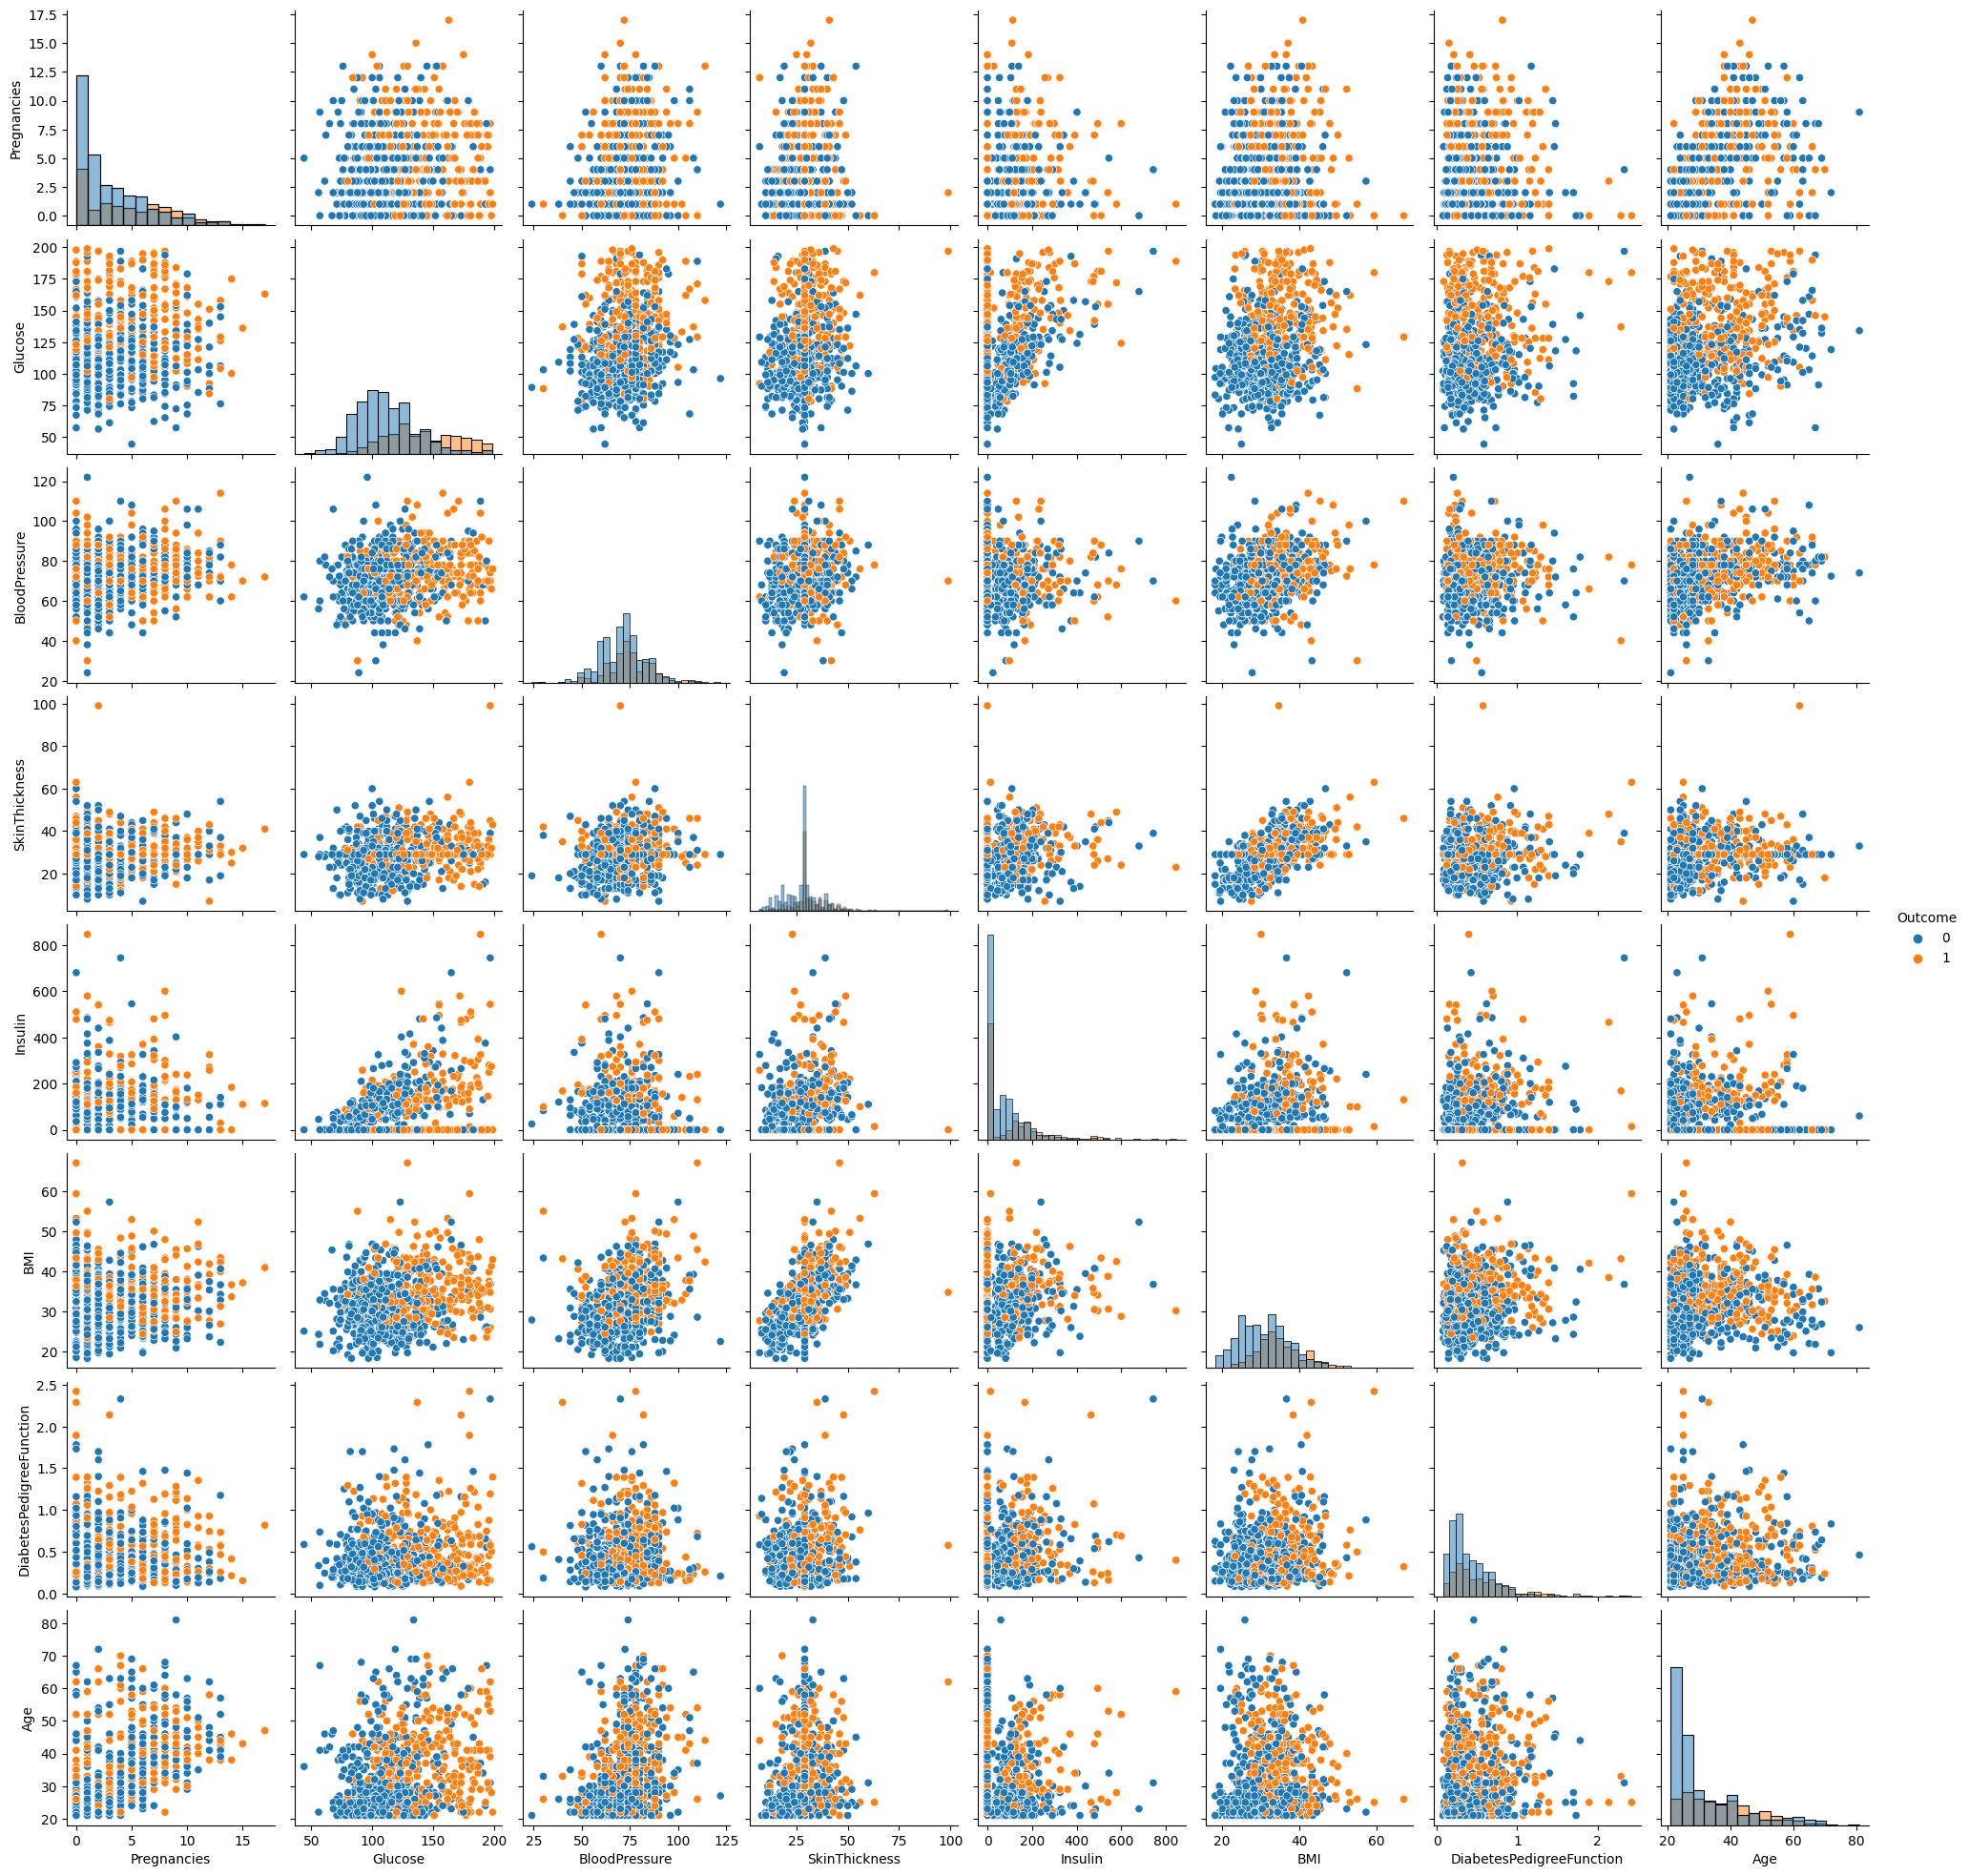

In [64]:
sns.pairplot(data,hue="Outcome",diag_kind='hist')

## Correlation Plots
- To easily quentify which features are corrleted with other

In [67]:
# The corr() function calculates the pairwise correlation between columns in the DataFrame
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.081770,-0.073535,0.021559,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192686,0.331080,0.231128,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.191853,-0.046829,0.281199,-0.002763,0.324595,0.166074
SkinThickness,0.081770,0.192686,0.191853,1.000000,0.116547,0.543205,0.102188,0.126107,0.214873
Insulin,-0.073535,0.331080,-0.046829,0.116547,1.000000,0.184972,0.185071,-0.042163,0.130548
BMI,0.021559,0.231128,0.281199,0.543205,0.184972,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.102188,0.185071,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.126107,-0.042163,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.214873,0.130548,0.312038,0.173844,0.238356,1.000000


<Axes: >

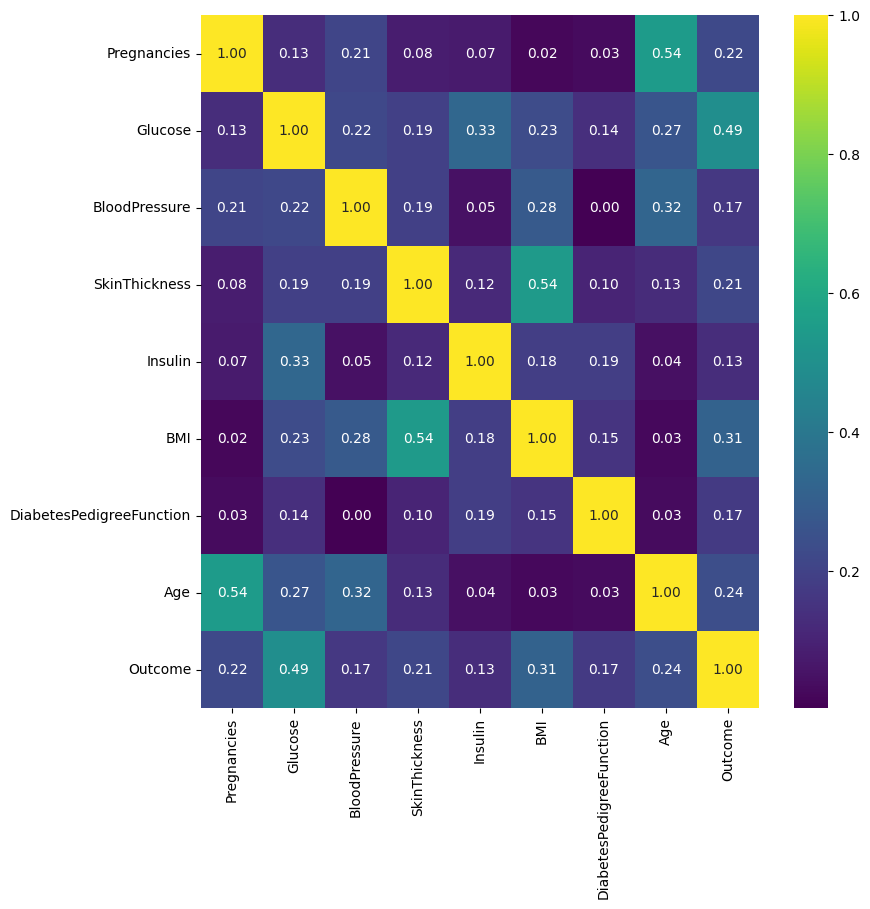

In [66]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.corr()),annot=True,cmap="viridis",fmt="0.2f")

## Covariance Plot
  Is a mesure of how much two random variable vary together

  It is same corr but difference at the scale 

In [68]:
data.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,11.354056,13.118128,8.499282,2.422243,-28.555231,0.499439,-0.037426,21.570620,0.356618
Glucose,13.118128,926.346983,80.394788,51.556791,1161.282727,48.364184,1.382151,95.401356,7.155569
BloodPressure,8.499282,80.394788,146.321591,20.402013,-65.280466,23.385786,-0.011075,46.175523,0.958140
SkinThickness,2.422243,51.556791,20.402013,77.285567,118.077762,32.831966,0.297652,13.037818,0.900960
Insulin,-28.555231,1161.282727,-65.280466,118.077762,13281.180078,146.557369,7.066681,-57.143290,7.175671
BMI,0.499439,48.364184,23.385786,32.831966,146.557369,47.268056,0.349522,2.069604,1.023213
DiabetesPedigreeFunction,-0.037426,1.382151,-0.011075,0.297652,7.066681,0.349522,0.109779,0.130772,0.027472
Age,21.570620,95.401356,46.175523,13.037818,-57.143290,2.069604,0.130772,138.303046,1.336953
Outcome,0.356618,7.155569,0.958140,0.900960,7.175671,1.023213,0.027472,1.336953,0.227483


<Axes: >

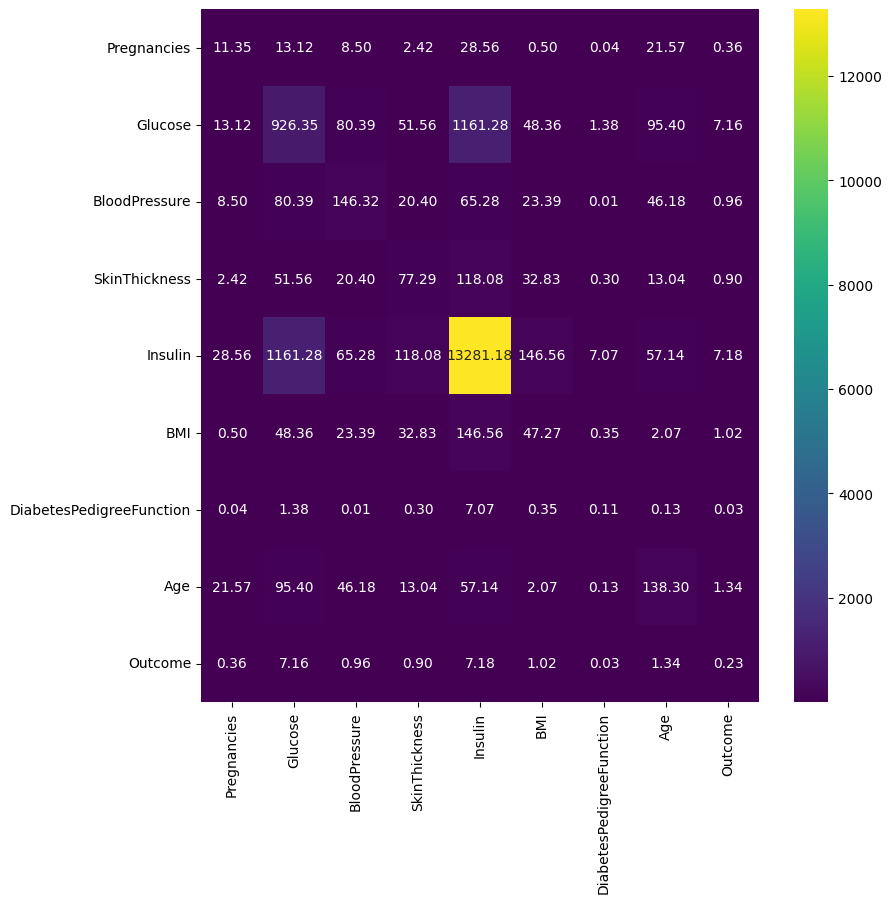

In [70]:
plt.figure(figsize=(9,9))
sns.heatmap(np.abs(data.cov()),annot=True,cmap="viridis",fmt="0.2f")

## Box Plots

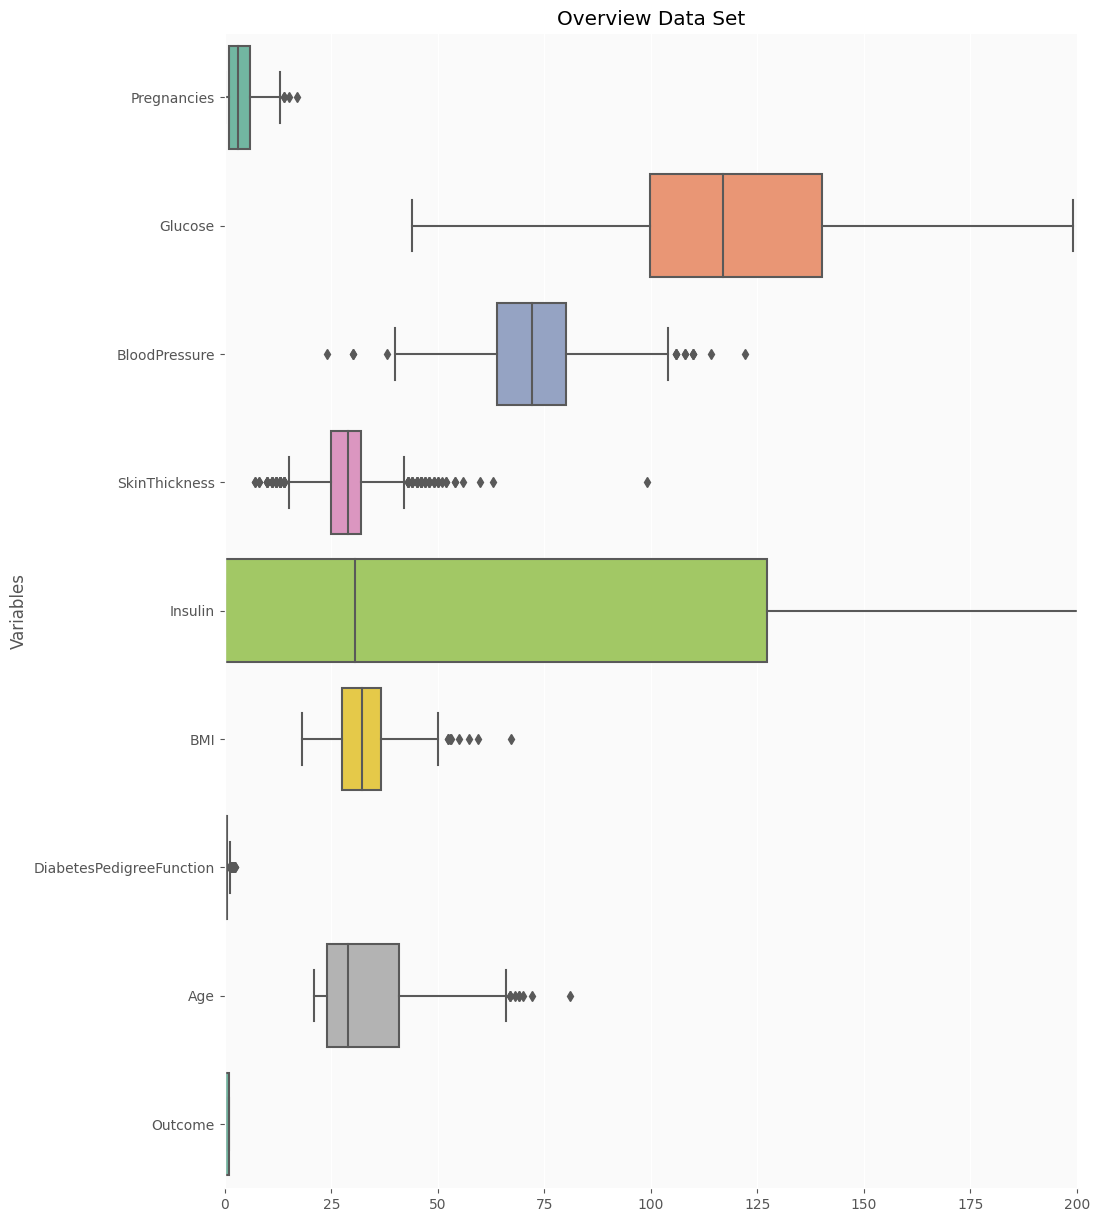

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')  # Using ggplot2 style visuals 

f, ax = plt.subplots(figsize=(11, 15))

ax.set_facecolor('#fafafa')  # Set the background color of the plot
ax.set(xlim=(-.05, 200))  # Set the x-axis limits
plt.ylabel('Variables')  # Set the label for the y-axis
plt.title("Overview Data Set")  # Set the title of the plot

# Create a box plot using Seaborn
ax = sns.boxplot(data=data, orient='h', palette='Set2')

### Show relation between pregnancies and target
because i think pregnancies don't have effect at the model

<Axes: xlabel='Pregnancies', ylabel='count'>

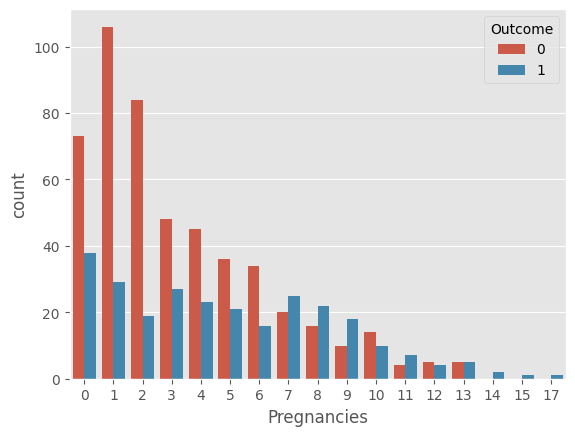

In [78]:
sns.countplot(x='Pregnancies',hue='Outcome',data=data)

### Relation between age and the target used point plot


<Axes: xlabel='Outcome', ylabel='Age'>

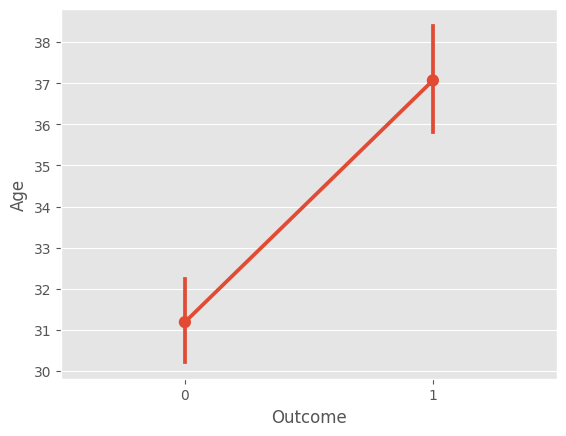

In [79]:
# Relation between age and the target used point plot
sns.pointplot(x='Outcome', y= 'Age', data=data)

# Standard Scaling


In [135]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

### Scale and show data in dataframe

In [136]:
X =  pd.DataFrame(sc_X.fit_transform(data.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [137]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.692891,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.692891,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.692891,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,0.123302,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.765836,1.549303,5.484909,-0.020496


### Identify y with the target

In [138]:
y = data.Outcome

In [139]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# Spliting the data

In [141]:
# Spliting data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [142]:
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

614
154
614
154


# Apply Classification algorihms or models

### 1. Logistic Regression  

import library and fitting the model

In [158]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()
logistic.fit(X_train,y_train)  

LogisticRegression()

Evalute the model using the test data and calculate acc

In [159]:
accuracy = logistic.score(X_test,y_test)
print("Accurecy = " , accuracy * 100, "%")

Accurecy =  81.81818181818183 %


In [160]:
# Assuming you have trained a regression model 'reg' and have test data 'X_test' and 'y_test' for evaluation

# Predict the target variable using the trained model
logistic_pred = logistic.predict(X_test)

# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

# Print the classification report
print("Classification Report is:\n", classification_report(y_test, logistic_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, logistic_pred))

# Calculate and print the training score
print("Training Score:\n", logistic.score(X_train, y_train) * 100)

# Calculate and print the mean squared error
print("Mean Squared Error:\n", mean_squared_error(y_test, logistic_pred))

# Calculate and print the R2 score
print("R2 score is:\n", r2_score(y_test, logistic_pred))

Classification Report is:
               precision    recall  f1-score   support

           0       0.84      0.92      0.88       107
           1       0.76      0.60      0.67        47

    accuracy                           0.82       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Confusion Matrix:
 [[98  9]
 [19 28]]
Training Score:
 77.0358306188925
Mean Squared Error:
 0.18181818181818182
R2 score is:
 0.14257307615828196


### 2. KNeighborsClassifier


In [149]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [164]:
# Assuming you have trained a k-nearest neighbors model 'knn' and have test data 'X_test' and 'y_test' for evaluation

# Predict the target variable using the trained model
knn_pred = knn.predict(X_test)

# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

# Print the classification report
print("Classification Report is:\n", classification_report(y_test, knn_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, knn_pred))

# Calculate and print the training score
print("Training Score:\n", knn.score(X_train, y_train) * 100)

# Calculate and print the mean squared error
print("Mean Squared Error:\n", mean_squared_error(y_test, knn_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86       107
           1       0.68      0.64      0.66        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.80      0.80      0.80       154

Confusion Matrix:
 [[93 14]
 [17 30]]
Training Score:
 78.17589576547232
Mean Squared Error:
 0.2012987012987013


In [165]:
print(accuracy_score(y_test,knn_pred)*100)

79.87012987012987


### 3. Decision Tree

In [154]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [166]:
# Assuming you have trained a decision tree model 'dtree' and have test data 'X_test' and 'y_test' for evaluation

# Predict the target variable using the trained model
dtree_pred = dtree.predict(X_test)

# Import necessary metrics from scikit-learn
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

# Print the classification report
print("Classification Report is:\n", classification_report(y_test, dtree_pred))

# Print the confusion matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, dtree_pred))

# Calculate and print the training score
print("Training Score:\n", dtree.score(X_train, y_train) * 100)

# Calculate and print the mean squared error
print("Mean Squared Error:\n", mean_squared_error(y_test, dtree_pred))


Classification Report is:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       107
           1       0.69      0.51      0.59        47

    accuracy                           0.78       154
   macro avg       0.75      0.70      0.72       154
weighted avg       0.77      0.78      0.77       154

Confusion Matrix:
 [[96 11]
 [23 24]]
Training Score:
 81.92182410423453
Mean Squared Error:
 0.22077922077922077


In [167]:
print(accuracy_score(y_test,dtree_pred)*100)

77.92207792207793


# Compare between this models

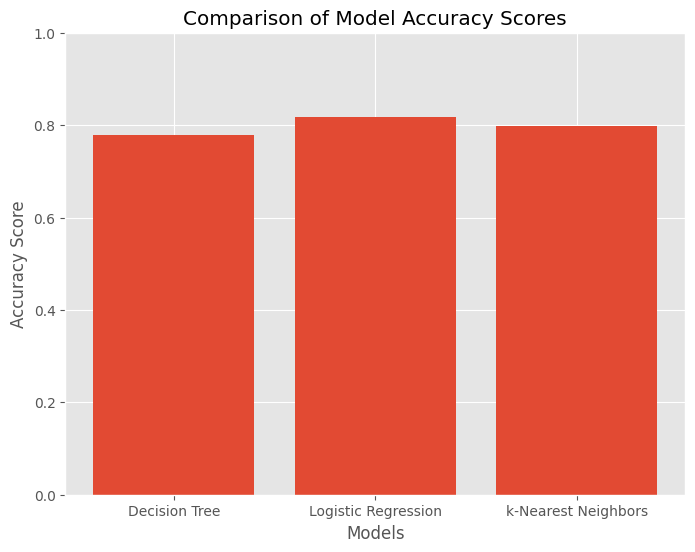

In [168]:

# Calculate the accuracy scores for each model
accuracy_scores = [accuracy_score(y_test, dtree_pred),
                   accuracy_score(y_test, logistic_pred),
                   accuracy_score(y_test, knn_pred)]

# Define the model names
model_names = ['Decision Tree', 'Logistic Regression', 'k-Nearest Neighbors']

# Create a bar plot to compare the accuracy scores
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracy_scores)
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Model Accuracy Scores')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()


# ROC AUC
- This information from google https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc.

ROC (Receiver Operating Characteristic) curve and AUC (Area Under the Curve) are commonly used evaluation metrics for binary classification models.

ROC Curve:
The ROC curve is a graphical representation of the performance of a binary classification model at various classification thresholds. It plots the true positive rate (sensitivity or recall) on the y-axis against the false positive rate (specificity) on the x-axis. The curve shows the trade-off between sensitivity and specificity for different threshold values. The higher the curve is towards the top-left corner of the plot, the better the model's performance.

AUC (Area Under the Curve):
The AUC is a metric that quantifies the overall performance of a binary classification model based on the ROC curve. It calculates the area under the ROC curve, which ranges from 0 to 1. An AUC of 1 represents a perfect classifier, while an AUC of 0.5 represents a random classifier with no predictive power.

Interpretation:
A higher AUC value indicates better discrimination between the positive and negative classes. It represents the probability that a randomly chosen positive sample will be ranked higher than a randomly chosen negative sample. Generally, an AUC above 0.5 is considered good, while an AUC close to 1 indicates excellent performance.

In [169]:
from sklearn.metrics import roc_curve,auc

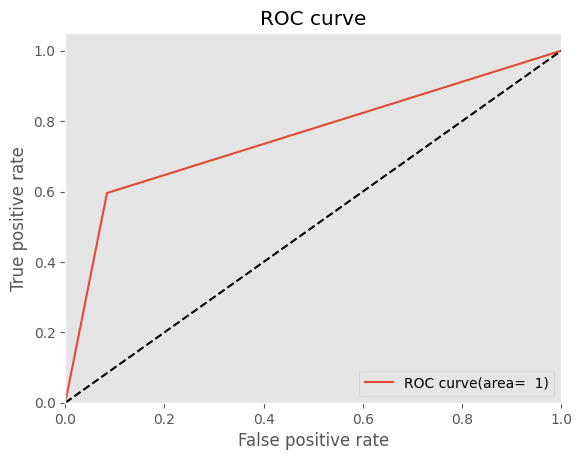

In [171]:
fpr,tpr,_=roc_curve(y_test,logistic_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

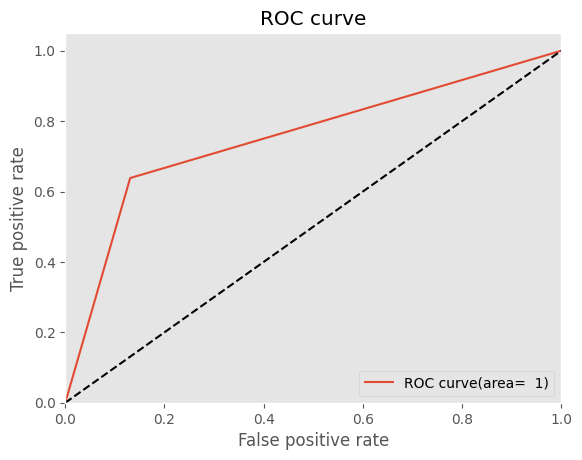

In [172]:
fpr,tpr,_=roc_curve(y_test,knn_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

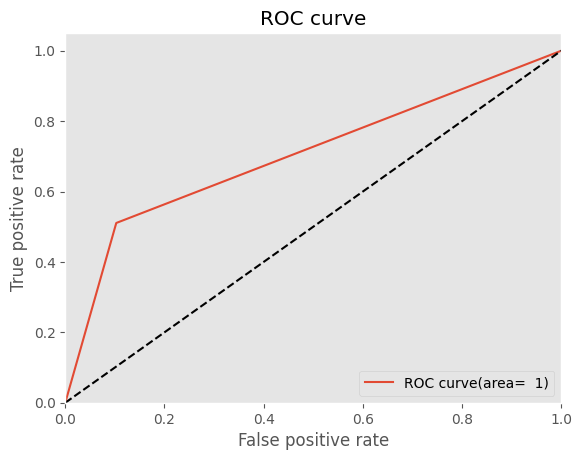

In [173]:
fpr,tpr,_=roc_curve(y_test,dtree_pred)
#calculate AUC
roc_auc=auc(fpr,tpr)
#plot of ROC curve for a specified class
plt.figure()
plt.plot(fpr,tpr,label='ROC curve(area= %2.f)' %roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Thanks: Dr.Ahmed Nagy.

Created by : Karim Adel Eid

Date : 25/5/2023 